In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:\CampusX_DSMP_2.0\Machine_Learning\Week-23_Linear-Regression\placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

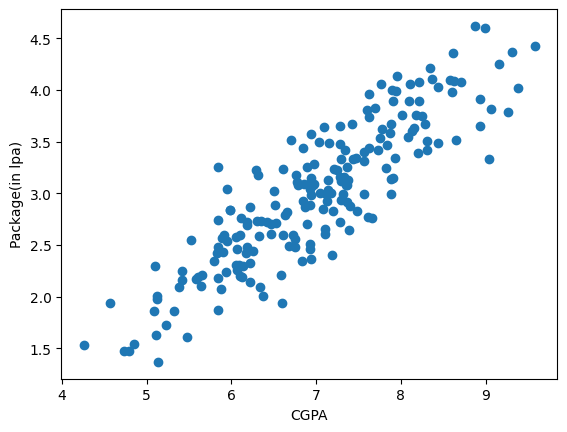

In [6]:
# linear relationship between both columns 
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

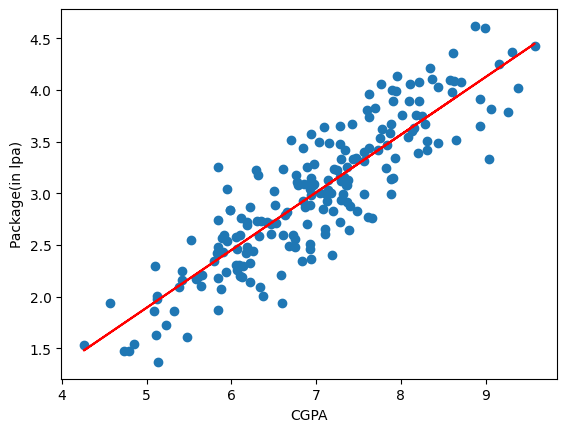

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

## Linear Regression Metrics

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
y_pred = lr.predict(X_test)

In [16]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

### MAE

In [17]:
# result is in lpa
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


### MSE

In [18]:
# result is not in lpa
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


### RMSE

In [29]:
# result is in lpa
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


### R2 _Score

In [24]:
r2 = r2_score(y_test,y_pred)
print("R2_Score",r2)

R2_Score 0.780730147510384


#### cgpa column is able to explain 78% variance present in output (placements) column 

### Adjusted R2 score

In [22]:
X_test.shape

(40, 1)

In [23]:
1 - ((1-r2)*(40-1)/(40-1-1)) # n here is 40, k is 1, r2 is r2 value

0.7749598882343415

### Now we are adding an irrelevant column in our existing dataset and will observe the changes in r2 score and adjusted r2 score 

In [25]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.477255,3.26
1,5.12,0.044663,1.98
2,7.82,0.122488,3.25
3,7.42,0.946916,3.67
4,6.94,0.099882,3.57


Text(0, 0.5, 'Package(in lpa)')

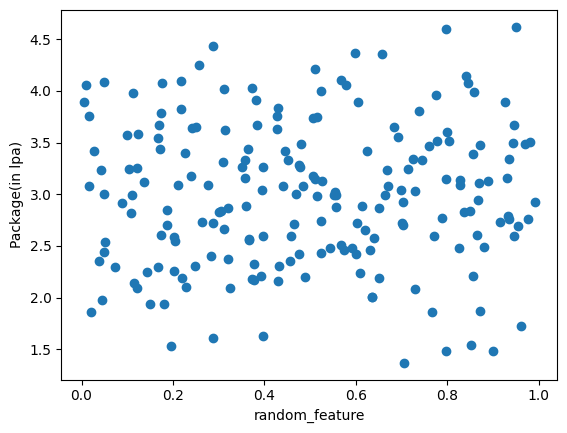

In [26]:
# random relationship between our new column and package column 
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [27]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

In [34]:
print("R2 score: ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score:  0.7813874216085382


#### There is very small increase in the value of r2 score. Which is not desirable as added column was irrelevant to target column.

In [35]:
print("Adjusted R score: ",1 - ((1-r2)*(40-1)/(40-1-2)))

Adjusted R score:  0.7695705254792701


#### adjusted r score decreases as compare to previous value due to addition of irrelevant column 

### Now we are adding an relevant column in our existing dataset and will observe the changes in r2 score and adjusted r2 score 

In [36]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [37]:
new_df2.sample(5)

,cgpa,iq,package
114,5.84,1.77,1.87
2,7.82,3.35,3.25
189,8.11,4.56,4.06
99,6.61,4.24,3.24
151,6.12,2.26,2.76


Text(0, 0.5, 'Package(in lpa)')

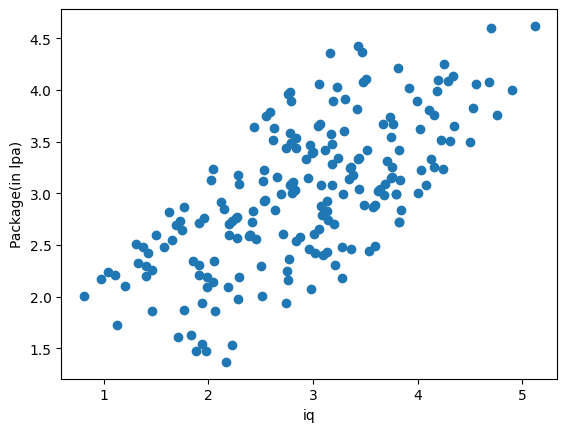

In [38]:
# there is a  kind of linear relationship between iq and package columns
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [40]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
print("R2 score: ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score:  0.8316084561247524


#### r2 score increases abruptly

In [46]:
print("Adjusted R score: ",1 - ((1-r2)*(40-1)/(40-1-2)))

Adjusted R score:  0.8225062105098742


#### Adjusted r2 score also increases